In [2]:
import networkx as nx
import math
# from networkx.readwrite import graphml

num_chips = 16
# calculate crossings with only 2 waveguides per line (to and back)
# so that the baseline bw-per-gpu is 16(WDM)*4GBps*15(TRx groups per GPU)=960GBps
# baseline_BW=960 #GBps
# parallel_links = 2
# Create graph
G = nx.complete_graph(num_chips)
labels = {i: str(i) for i in range(num_chips)}
nx.set_node_attributes(G, labels, 'label')

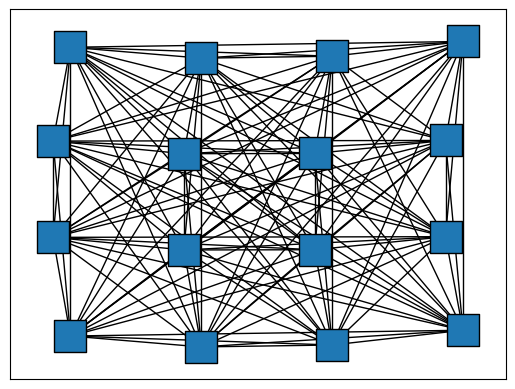

In [6]:
subset_dict = {}
for i in range(num_chips):
    subset_dict[i] = i // math.sqrt(num_chips)

# Add the subset information to the graph
nx.set_node_attributes(G, subset_dict, 'subset')

pos = nx.multipartite_layout(G)
shift = 0.1  # set the shift amount for the x-axis
for n in pos:
    pos[n][0] += (pos[n][1])*(pos[n][1]) * shift
    pos[n][1] += (pos[n][0])*(pos[n][0]) * shift
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=500, 
                 alpha=1.0, edge_color='black',node_shape='s', edgecolors='black')
